SSolve de un atomo muy fuera de resonancia

In [71]:
import numpy as np
from qutip import sigmax, sigmaz, basis,destroy,sigmay
# Parámetros del sistema
Delta = 0  # Desintonía (detuning)
Omega = 1.0   # Frecuencia de Rabi
# Definimos los estados base y excitado para un sistema de dos niveles
Kg = basis(2, 0)  # estado base |g⟩
Ke = basis(2, 1)  # estado excitado |e⟩
psi0 = Kg
# Hamiltoniano
# Hamiltoniano de Rabi
sigma_z = Ke * Ke.dag() - Kg * Kg.dag()
H = 0.5 * Delta * sigma_z+0.5 * Omega * (Ke * Kg.dag() + Kg * Ke.dag())



# Operador de colapso (decaimiento)
gamma = 1  # Tasa de decaimiento
c_ops = [np.sqrt(gamma) * destroy(2)]

tlist = np.linspace(0, 10, 100)  # Desde t=0 hasta t=10, con 100 puntos

e_ops = [sigmax(), sigmay()]
sc_ops=np.sqrt(1) * sigmay().dag()

In [72]:
from qutip import ssesolve

# Número de trayectorias
ntraj = 50

# Ejecutar la simulación
result = ssesolve(H, psi0, tlist, sc_ops=c_ops, e_ops=e_ops, ntraj=ntraj)

10.0%. Run time:   0.81s. Est. time left: 00:00:00:07
20.0%. Run time:   1.84s. Est. time left: 00:00:00:07
30.0%. Run time:   2.85s. Est. time left: 00:00:00:06
40.0%. Run time:   3.88s. Est. time left: 00:00:00:05
50.0%. Run time:   4.88s. Est. time left: 00:00:00:04
60.0%. Run time:   5.88s. Est. time left: 00:00:00:03
70.0%. Run time:   6.88s. Est. time left: 00:00:00:02
80.0%. Run time:   7.88s. Est. time left: 00:00:00:01
90.0%. Run time:   8.87s. Est. time left: 00:00:00:00
100.0%. Run time:   9.88s. Est. time left: 00:00:00:00
Total run time:  10.08s


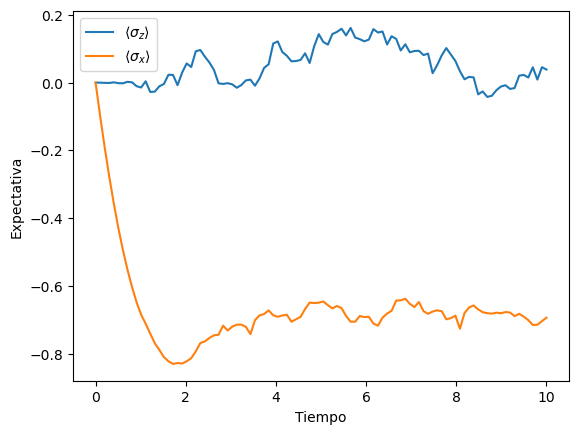

In [73]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(tlist, result.expect[0], label=r'$\langle \sigma_z \rangle$')
plt.plot(tlist, result.expect[1], label=r'$\langle \sigma_x \rangle$')
plt.xlabel('Tiempo')
plt.ylabel('Expectativa')
plt.legend()
plt.show()

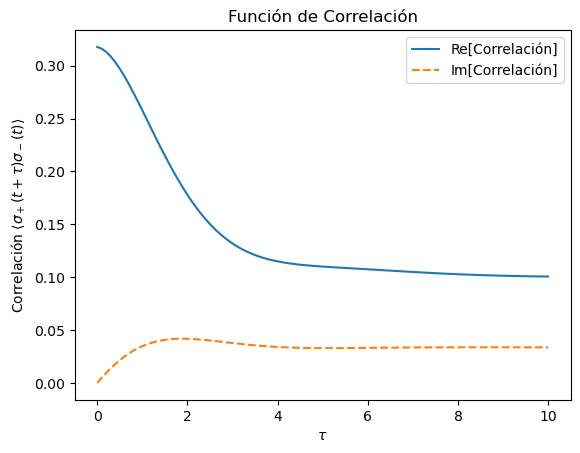

In [74]:
import numpy as np
from qutip import correlation_2op_2t, destroy, basis, mesolve, Qobj

# Parámetros
gamma = 1.0       # Tasa de decaimiento
Omega = 3.0       # Frecuencia de Rabi
taus = np.linspace(0, 10, 100)  # Rango de tiempos para la correlación

Delta = 10.0  # Desintonía (detuning)
Omega = 1.0   # Frecuencia de Rabi
# Definimos los estados base y excitado para un sistema de dos niveles
Kg = basis(2, 0)  # estado base |g⟩
Ke = basis(2, 1)  # estado excitado |e⟩
psi0 = Kg
# Hamiltoniano
# Hamiltoniano de Rabi
H = 0.5 * Omega * (Ke * Kg.dag() + Kg * Ke.dag())




# Operador de colapso (decaimiento)
gamma = 1  # Tasa de decaimiento
c_ops = [np.sqrt(gamma) * destroy(2)]
# Estado inicial
psi0 = (basis(2, 0) + basis(2, 1)).unit()  # Superposición de |0⟩ y |1⟩

# Operadores de colapso (decaímiento)
c_ops = [np.sqrt(gamma) * sigma_minus]  # Decaimiento a tasa gamma

# Calcular la función de correlación
correlation = correlation_2op_2t(H, psi0, taus, taus, c_ops, sigma_plus, sigma_minus)

# Graficar la función de correlación
import matplotlib.pyplot as plt

plt.plot(taus,np.mean(np.real(correlation), axis=0) , label="Re[Correlación]")
plt.plot(taus,np.mean(np.imag(correlation), axis=0), label="Im[Correlación]", linestyle='dashed')
plt.xlabel("$\\tau$")
plt.ylabel("Correlación $\\langle \\sigma_+(t+\\tau) \\sigma_-(t) \\rangle$")
plt.title("Función de Correlación")
plt.legend()
plt.show()

In [53]:
promedio_columnas = np.mean(lista_de_listas, axis=0)

array([[0.5       , 0.46472448, 0.41302776, ..., 0.00176752, 0.00172248,
        0.00167988],
       [0.45268453, 0.42179839, 0.37590517, ..., 0.00273913, 0.00269811,
        0.00265939],
       [0.41389483, 0.38860549, 0.34920251, ..., 0.00570062, 0.00566223,
        0.0056265 ],
       ...,
       [0.47376276, 0.46333202, 0.43428286, ..., 0.02658585, 0.02653628,
        0.02649333],
       [0.47377264, 0.46333704, 0.43428323, ..., 0.02658135, 0.02653181,
        0.02648887],
       [0.47377311, 0.46333328, 0.4342758 , ..., 0.02657682, 0.02652727,
        0.02648434]])